## RF Deep Learning
Exploring more ways to exploit Radio Frequency (RF) data using deep learning.

In [2]:
# Imports
from RFDataReader import RFDataReader
from RFNN import *
import numpy as np
from matplotlib import pyplot as plt
import os


In [3]:
# Define data file input
dataFile = '2016.04C.multisnr.pkl'

In [4]:
# Setup important parameters of the data
sampleRate = 1e6 # input sample rate of dataset

In [5]:
# Create RFDataReader object to read in and parse the data
# This will display some statistics of the data to the console
RFData = RFDataReader(dataFile, sampleRate)


Modulation types present in data:

'8PSK'
'AM-DSB'
'AM-SSB'
'BPSK'
'CPFSK'
'GFSK'
'PAM4'
'QAM16'
'QAM64'
'QPSK'
'WBFM'

SNR ranges for each modulation type in data:

-20
-18
-16
-14
-12
-10
-8
-6
-4
-2
0
2
4
6
8
10
12
14
16
18


In [6]:
# Specify which SNR ranges for input dataset processing
SNRs = range(0, 20, 2) # SNR ranges to use in data processing

In [7]:
# Specify which modulations to look at for input dataset processing
MODs = ['AM-DSB', 'AM-SSB', 'WBFM', '8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']

In [8]:
# Specify what the output labels should be
outputClasses = MODs
LABELs = range(0, len(MODs))
inputDim = [128, 2]
numOutputClasses = len(outputClasses)

In [9]:
# Create training and testing data sets
RFData.create_train_and_test_sets(trainingRatio=0.8, snrs_used=SNRs,
                                    mods_used=MODs, outputClasses=outputClasses,
                                    labels=LABELs, normalize=True)

Creating training and testing data sets...

Modulation:  AM-DSB
Number of training samples:  5640
Number of testing samples:  1410

Modulation:  AM-SSB
Number of training samples:  5640
Number of testing samples:  1410

Modulation:  WBFM
Number of training samples:  6230
Number of testing samples:  1560

Modulation:  8PSK
Number of training samples:  3300
Number of testing samples:  830

Modulation:  BPSK
Number of training samples:  9970
Number of testing samples:  2500

Modulation:  CPFSK
Number of training samples:  9970
Number of testing samples:  2500

Modulation:  GFSK
Number of training samples:  9970
Number of testing samples:  2500

Modulation:  PAM4
Number of training samples:  4970
Number of testing samples:  1250

Modulation:  QAM16
Number of training samples:  2480
Number of testing samples:  620

Modulation:  QAM64
Number of training samples:  1640
Number of testing samples:  420

Modulation:  QPSK
Number of training samples:  4970
Number of testing samples:  1250



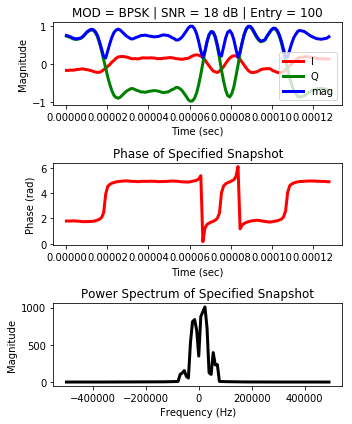

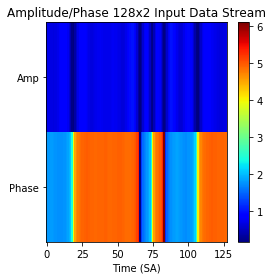

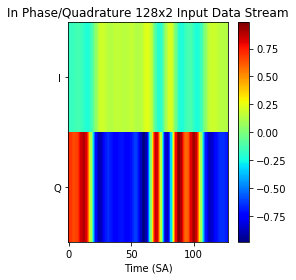

In [10]:
RFData.snapPlot('BPSK', 18, 100, normalize=True)
#RFData.snapPlot('QPSK', 18, 100, normalize=True)
#RFData.snapPlot('AM-DSB', 18, 100, normalize=True)

In [11]:
# Initialize our RF Neural Network
RFNet = RFNN(inputDim, numOutputClasses)

In [12]:
# Set up the first layer
RFNet.create_conv_layer(num_feature_maps=64, patch_size=[8, 2], max_pool=True,
                        ksize=[1, 4, 2, 1], pool_strides=[1, 2, 2, 1], pool_padding='SAME')

# Set up the third layer
RFNet.create_fc_layer(num_nodes=512, dropout='True')

# Set up the final layer - softmax output on output classes
RFNet.create_readout_layer()

# Prepare our Neural Network for training and testing
RFNet.prepare(min_fcn='cross_entropy')

# Train our NN on the training data set we loaded in
train_acc = RFNet.train(RFData, data_type='IandQ', batch_size=50,
                            dropout=True, keep_prob_val=0.7)

# Plot training accuracy as a function of the batch
batches, train_accs = RFNet.get_train_results()

# Test our NN on the testing data set we loaded in
test_acc = RFNet.test(RFData, data_type='IandQ')

# Release tensorflow resources and close this session
RFNet.release()


start_idx = 0:  end_idx = 49
Batch number: 0 || Train Acc: 0.08163265
start_idx = 50:  end_idx = 99
Batch number: 1 || Train Acc: 0.040816326
start_idx = 100:  end_idx = 149
Batch number: 2 || Train Acc: 0.06122449
start_idx = 150:  end_idx = 199
Batch number: 3 || Train Acc: 0.1632653
start_idx = 200:  end_idx = 249
Batch number: 4 || Train Acc: 0.1632653
start_idx = 250:  end_idx = 299
Batch number: 5 || Train Acc: 0.1632653
start_idx = 300:  end_idx = 349
Batch number: 6 || Train Acc: 0.24489796
start_idx = 350:  end_idx = 399
Batch number: 7 || Train Acc: 0.10204082
start_idx = 400:  end_idx = 449
Batch number: 8 || Train Acc: 0.08163265
start_idx = 450:  end_idx = 499
Batch number: 9 || Train Acc: 0.20408164
start_idx = 500:  end_idx = 549
Batch number: 10 || Train Acc: 0.18367347
start_idx = 550:  end_idx = 599
Batch number: 11 || Train Acc: 0.1632653
start_idx = 600:  end_idx = 649
Batch number: 12 || Train Acc: 0.26530612
start_idx = 650:  end_idx = 699
Batch number: 13 || Trai

start_idx = 7650:  end_idx = 7699
Batch number: 153 || Train Acc: 0.40816328
start_idx = 7700:  end_idx = 7749
Batch number: 154 || Train Acc: 0.36734694
start_idx = 7750:  end_idx = 7799
Batch number: 155 || Train Acc: 0.5510204
start_idx = 7800:  end_idx = 7849
Batch number: 156 || Train Acc: 0.63265306
start_idx = 7850:  end_idx = 7899
Batch number: 157 || Train Acc: 0.59183675
start_idx = 7900:  end_idx = 7949
Batch number: 158 || Train Acc: 0.5510204
start_idx = 7950:  end_idx = 7999
Batch number: 159 || Train Acc: 0.53061223
start_idx = 8000:  end_idx = 8049
Batch number: 160 || Train Acc: 0.40816328
start_idx = 8050:  end_idx = 8099
Batch number: 161 || Train Acc: 0.6530612
start_idx = 8100:  end_idx = 8149
Batch number: 162 || Train Acc: 0.5102041
start_idx = 8150:  end_idx = 8199
Batch number: 163 || Train Acc: 0.6122449
start_idx = 8200:  end_idx = 8249
Batch number: 164 || Train Acc: 0.59183675
start_idx = 8250:  end_idx = 8299
Batch number: 165 || Train Acc: 0.6530612
start

start_idx = 14450:  end_idx = 14499
Batch number: 289 || Train Acc: 0.5510204
start_idx = 14500:  end_idx = 14549
Batch number: 290 || Train Acc: 0.59183675
start_idx = 14550:  end_idx = 14599
Batch number: 291 || Train Acc: 0.6530612
start_idx = 14600:  end_idx = 14649
Batch number: 292 || Train Acc: 0.63265306
start_idx = 14650:  end_idx = 14699
Batch number: 293 || Train Acc: 0.48979592
start_idx = 14700:  end_idx = 14749
Batch number: 294 || Train Acc: 0.59183675
start_idx = 14750:  end_idx = 14799
Batch number: 295 || Train Acc: 0.6122449
start_idx = 14800:  end_idx = 14849
Batch number: 296 || Train Acc: 0.5102041
start_idx = 14850:  end_idx = 14899
Batch number: 297 || Train Acc: 0.6530612
start_idx = 14900:  end_idx = 14949
Batch number: 298 || Train Acc: 0.6530612
start_idx = 14950:  end_idx = 14999
Batch number: 299 || Train Acc: 0.53061223
start_idx = 15000:  end_idx = 15049
Batch number: 300 || Train Acc: 0.63265306
start_idx = 15050:  end_idx = 15099
Batch number: 301 || T

start_idx = 21300:  end_idx = 21349
Batch number: 426 || Train Acc: 0.5102041
start_idx = 21350:  end_idx = 21399
Batch number: 427 || Train Acc: 0.5714286
start_idx = 21400:  end_idx = 21449
Batch number: 428 || Train Acc: 0.6122449
start_idx = 21450:  end_idx = 21499
Batch number: 429 || Train Acc: 0.5510204
start_idx = 21500:  end_idx = 21549
Batch number: 430 || Train Acc: 0.6122449
start_idx = 21550:  end_idx = 21599
Batch number: 431 || Train Acc: 0.6122449
start_idx = 21600:  end_idx = 21649
Batch number: 432 || Train Acc: 0.5714286
start_idx = 21650:  end_idx = 21699
Batch number: 433 || Train Acc: 0.7346939
start_idx = 21700:  end_idx = 21749
Batch number: 434 || Train Acc: 0.67346936
start_idx = 21750:  end_idx = 21799
Batch number: 435 || Train Acc: 0.53061223
start_idx = 21800:  end_idx = 21849
Batch number: 436 || Train Acc: 0.5510204
start_idx = 21850:  end_idx = 21899
Batch number: 437 || Train Acc: 0.48979592
start_idx = 21900:  end_idx = 21949
Batch number: 438 || Trai

start_idx = 28000:  end_idx = 28049
Batch number: 560 || Train Acc: 0.5714286
start_idx = 28050:  end_idx = 28099
Batch number: 561 || Train Acc: 0.59183675
start_idx = 28100:  end_idx = 28149
Batch number: 562 || Train Acc: 0.59183675
start_idx = 28150:  end_idx = 28199
Batch number: 563 || Train Acc: 0.6122449
start_idx = 28200:  end_idx = 28249
Batch number: 564 || Train Acc: 0.67346936
start_idx = 28250:  end_idx = 28299
Batch number: 565 || Train Acc: 0.6530612
start_idx = 28300:  end_idx = 28349
Batch number: 566 || Train Acc: 0.6530612
start_idx = 28350:  end_idx = 28399
Batch number: 567 || Train Acc: 0.63265306
start_idx = 28400:  end_idx = 28449
Batch number: 568 || Train Acc: 0.6530612
start_idx = 28450:  end_idx = 28499
Batch number: 569 || Train Acc: 0.5510204
start_idx = 28500:  end_idx = 28549
Batch number: 570 || Train Acc: 0.63265306
start_idx = 28550:  end_idx = 28599
Batch number: 571 || Train Acc: 0.48979592
start_idx = 28600:  end_idx = 28649
Batch number: 572 || T

start_idx = 34850:  end_idx = 34899
Batch number: 697 || Train Acc: 0.5102041
start_idx = 34900:  end_idx = 34949
Batch number: 698 || Train Acc: 0.59183675
start_idx = 34950:  end_idx = 34999
Batch number: 699 || Train Acc: 0.6122449
start_idx = 35000:  end_idx = 35049
Batch number: 700 || Train Acc: 0.71428573
start_idx = 35050:  end_idx = 35099
Batch number: 701 || Train Acc: 0.67346936
start_idx = 35100:  end_idx = 35149
Batch number: 702 || Train Acc: 0.5714286
start_idx = 35150:  end_idx = 35199
Batch number: 703 || Train Acc: 0.5102041
start_idx = 35200:  end_idx = 35249
Batch number: 704 || Train Acc: 0.63265306
start_idx = 35250:  end_idx = 35299
Batch number: 705 || Train Acc: 0.6122449
start_idx = 35300:  end_idx = 35349
Batch number: 706 || Train Acc: 0.5510204
start_idx = 35350:  end_idx = 35399
Batch number: 707 || Train Acc: 0.5510204
start_idx = 35400:  end_idx = 35449
Batch number: 708 || Train Acc: 0.6530612
start_idx = 35450:  end_idx = 35499
Batch number: 709 || Tra

start_idx = 41400:  end_idx = 41449
Batch number: 828 || Train Acc: 0.71428573
start_idx = 41450:  end_idx = 41499
Batch number: 829 || Train Acc: 0.71428573
start_idx = 41500:  end_idx = 41549
Batch number: 830 || Train Acc: 0.6530612
start_idx = 41550:  end_idx = 41599
Batch number: 831 || Train Acc: 0.6122449
start_idx = 41600:  end_idx = 41649
Batch number: 832 || Train Acc: 0.67346936
start_idx = 41650:  end_idx = 41699
Batch number: 833 || Train Acc: 0.6530612
start_idx = 41700:  end_idx = 41749
Batch number: 834 || Train Acc: 0.6122449
start_idx = 41750:  end_idx = 41799
Batch number: 835 || Train Acc: 0.7346939
start_idx = 41800:  end_idx = 41849
Batch number: 836 || Train Acc: 0.75510204
start_idx = 41850:  end_idx = 41899
Batch number: 837 || Train Acc: 0.6122449
start_idx = 41900:  end_idx = 41949
Batch number: 838 || Train Acc: 0.6530612
start_idx = 41950:  end_idx = 41999
Batch number: 839 || Train Acc: 0.53061223
start_idx = 42000:  end_idx = 42049
Batch number: 840 || Tr

start_idx = 47950:  end_idx = 47999
Batch number: 959 || Train Acc: 0.67346936
start_idx = 48000:  end_idx = 48049
Batch number: 960 || Train Acc: 0.63265306
start_idx = 48050:  end_idx = 48099
Batch number: 961 || Train Acc: 0.5510204
start_idx = 48100:  end_idx = 48149
Batch number: 962 || Train Acc: 0.5102041
start_idx = 48150:  end_idx = 48199
Batch number: 963 || Train Acc: 0.46938777
start_idx = 48200:  end_idx = 48249
Batch number: 964 || Train Acc: 0.53061223
start_idx = 48250:  end_idx = 48299
Batch number: 965 || Train Acc: 0.67346936
start_idx = 48300:  end_idx = 48349
Batch number: 966 || Train Acc: 0.63265306
start_idx = 48350:  end_idx = 48399
Batch number: 967 || Train Acc: 0.7346939
start_idx = 48400:  end_idx = 48449
Batch number: 968 || Train Acc: 0.67346936
start_idx = 48450:  end_idx = 48499
Batch number: 969 || Train Acc: 0.6122449
start_idx = 48500:  end_idx = 48549
Batch number: 970 || Train Acc: 0.59183675
start_idx = 48550:  end_idx = 48599
Batch number: 971 ||

start_idx = 54600:  end_idx = 54649
Batch number: 1092 || Train Acc: 0.6530612
start_idx = 54650:  end_idx = 54699
Batch number: 1093 || Train Acc: 0.7755102
start_idx = 54700:  end_idx = 54749
Batch number: 1094 || Train Acc: 0.75510204
start_idx = 54750:  end_idx = 54799
Batch number: 1095 || Train Acc: 0.6122449
start_idx = 54800:  end_idx = 54849
Batch number: 1096 || Train Acc: 0.6122449
start_idx = 54850:  end_idx = 54899
Batch number: 1097 || Train Acc: 0.71428573
start_idx = 54900:  end_idx = 54949
Batch number: 1098 || Train Acc: 0.6938776
start_idx = 54950:  end_idx = 54999
Batch number: 1099 || Train Acc: 0.67346936
start_idx = 55000:  end_idx = 55049
Batch number: 1100 || Train Acc: 0.6530612
start_idx = 55050:  end_idx = 55099
Batch number: 1101 || Train Acc: 0.6530612
start_idx = 55100:  end_idx = 55149
Batch number: 1102 || Train Acc: 0.75510204
start_idx = 55150:  end_idx = 55199
Batch number: 1103 || Train Acc: 0.67346936
start_idx = 55200:  end_idx = 55249
Batch numbe

start_idx = 61200:  end_idx = 61249
Batch number: 1224 || Train Acc: 0.6938776
start_idx = 61250:  end_idx = 61299
Batch number: 1225 || Train Acc: 0.7755102
start_idx = 61300:  end_idx = 61349
Batch number: 1226 || Train Acc: 0.5714286
start_idx = 61350:  end_idx = 61399
Batch number: 1227 || Train Acc: 0.63265306
start_idx = 61400:  end_idx = 61449
Batch number: 1228 || Train Acc: 0.7755102
start_idx = 61450:  end_idx = 61499
Batch number: 1229 || Train Acc: 0.7346939
start_idx = 61500:  end_idx = 61549
Batch number: 1230 || Train Acc: 0.71428573
start_idx = 61550:  end_idx = 61599
Batch number: 1231 || Train Acc: 0.6938776
start_idx = 61600:  end_idx = 61649
Batch number: 1232 || Train Acc: 0.6938776
start_idx = 61650:  end_idx = 61699
Batch number: 1233 || Train Acc: 0.6122449
start_idx = 61700:  end_idx = 61749
Batch number: 1234 || Train Acc: 0.71428573
start_idx = 61750:  end_idx = 61799
Batch number: 1235 || Train Acc: 0.6530612
start_idx = 61800:  end_idx = 61849
Batch number:

In [14]:
# Plot training accuracy as a function of batch
def plot_train_results(batches, train_accs, filt_ratio=1, fig_str=''):
    # Filter the training data as specified
    batches_filt = batches[0::filt_ratio]
    train_accs_filt = train_accs[0::filt_ratio]

    fig = plt.figure(figsize=(6.0, 4.0))

    # Put lables on the axes
    plt.xlabel('Batch #')
    plt.ylabel('Training Accuracy')
    plt.title('Training Accuracy as a Function of Batch')

    # Plot the data
    plt.plot(batches_filt, train_accs_filt, linewidth=3)
    plt.draw()

    if fig_str:
        fig.savefig(os.path.join(topDir, fig_str), bbox_inches='tight')

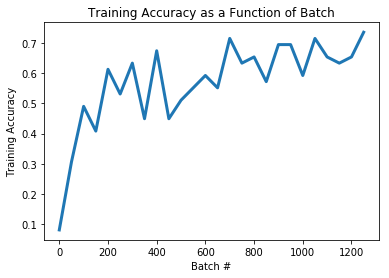

In [15]:
# Plot training results
plot_train_results(batches, train_accs, filt_ratio=50)

In [16]:
# Generate final results on test set by plotting confusion matrices
cm, norm_cm = RFNet.get_conf_mtxs()

In [17]:
def plot_confusion_matrix(cm, norm_cm, title='Confusion Matrix', fig_str='', mods=[], labels=[]):
    # Plot confusion matrix
    width, height = cm.shape
    fig_cm = plt.figure(figsize=(10.0, 10.0))
    ax = fig_cm.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(norm_cm, cmap=plt.cm.jet, interpolation='nearest')
    fig_cm.colorbar(res)

    # Set title and axes
    plt.title(title)

    # Add raw count labels for each category
    for x in range(width):
        for y in range(height):
            ax.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center',
                        verticalalignment='center', fontsize=15, color='white')

    # Add modulation labels
    plt.xticks(np.arange(0, len(labels)), labels)
    plt.yticks(np.arange(0, len(mods)), mods)

    # Save off figure
    if fig_str:
        fig_cm.savefig(os.path.join(topDir, fig_str), bbox_inches='tight')

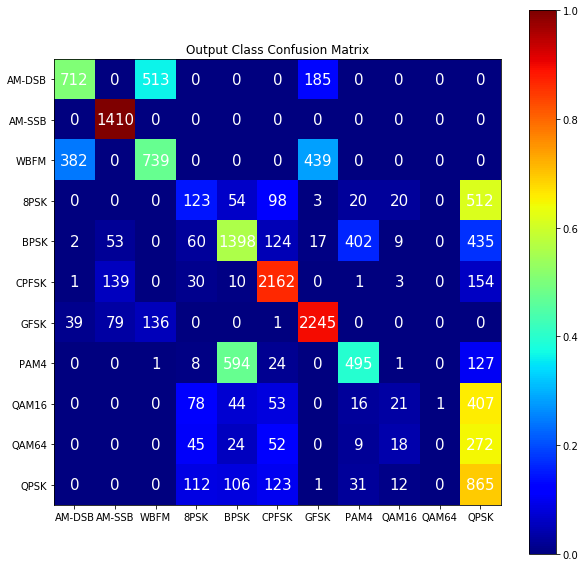

In [18]:
# Plot output class v. output class confusion matrix
plot_confusion_matrix(cm, norm_cm, title='Output Class Confusion Matrix',
                        mods=outputClasses, labels=outputClasses)

In [22]:
# Plot training accuracy as a function of SNR
def plot_test_acc_snr(y_true, y_pred, y_snr, SNRs, fig_str=''):
    acc_snr = []

    for sidx, snr in enumerate(SNRs):
        # Get indices of this SNR in our test set
        idxs = [i for i, x in enumerate(y_snr) if x == sidx]

        # Grab this part of the data
        y_true_local = y_true[idxs]
        y_pred_local = y_pred[idxs]

        # Compute accuracy on this subset
        acc_local, cts_local = compute_list_acc(y_true_local, y_pred_local)

        # Store this accuracy
        acc_snr.append(acc_local)

    # Plot test set accuracy as a function of SNR
    fig = plt.figure(figsize=(6.0, 4.0))

    plt.xlabel('SNR (dB)')
    plt.ylabel('Test Set Accuracy')
    plt.title('Test Set Accuracy as a Function of SNR')

    plt.plot(SNRs, acc_snr, linewidth=3)
    plt.draw()

    if fig_str:
        fig.savefig(os.path.join(topDir, fig_str), bbox_inches='tight')

In [23]:
# Function that filters results based on desired SNR ranges
def filt_by_snr(y_true, y_pred, y_mods, y_snrs, SNRs, desired_snr):
    # Get index of desired SNR within total SNR list
    sidx = SNRs.index(desired_snr)

    # Get indices of this SNR in our test set
    idxs = [i for i, x in enumerate(y_snrs) if x == sidx]

    # Grab this part of the data
    y_true_snr = y_true[idxs]
    y_local_snr = y_pred[idxs]
    y_mods_snr = y_mods[idxs]

    return y_true_snr, y_local_snr, y_mods_snr

In [20]:
# Function to create a confusion matrix where:
# Each modulation has a count associated with all the output labels
def create_mod_conf_mtx(y_true, y_pred, y_mods, mods, outputClasses):
    cm = []
    norm_cm = []
    # Iterate over each modulation
    for mod_idx, mod in enumerate(mods):
        # Get indicies of testing samples with this modulation type
        idxs = [i for i, x in enumerate(y_mods) if x == mod_idx]

        # Grab just this test classification data chunk
        y_true_mod = y_true[idxs]
        y_pred_mod = y_pred[idxs]

        # Compute overall accuracy for this modulation
        # Compute classification accuracy for this modulation based on specified output classes
        test_acc_mod = compute_list_acc(y_true_mod, y_pred_mod)
        print('Overall accuracy for Modulation ' + mod + ' : ' + str(test_acc_mod))

        # Compute tallies for each output class for this modulation
        mod_count_vec = []
        mod_acc_vec = []
        for lbl_idx, lbl in enumerate(outputClasses):
            mod_counts = len([i for i, x in enumerate(y_pred_mod) if x == lbl_idx])
            mod_acc = mod_counts / float(len(y_pred_mod))

            mod_count_vec.append(mod_counts)
            mod_acc_vec.append(mod_acc)

        cm.append(mod_count_vec)
        norm_cm.append(mod_acc_vec)

    return np.array(cm), np.array(norm_cm)

In [24]:
# Compute an accuracy (ratio of matching elements between two lists of the same length)
def compute_list_acc(list1, list2):
    # Error checking
    assert(len(list1) == len(list2))

    # Compute similarity
    acc = sum(list1 == list2) / float(len(list1))

    # Compute raw counts
    cts = sum(list1 == list2)

    return acc, cts


In [25]:
# Create a different confusion matrix - one that shows each modulation as a
# function of the output classes
y_true, y_pred = RFNet.get_truth_and_predicions()

cm_mod, norm_cm_mod = create_mod_conf_mtx(y_true, y_pred, RFData.testMods, MODs, outputClasses)

Overall accuracy for Modulation AM-DSB : (0.5049645390070922, 712)
Overall accuracy for Modulation AM-SSB : (1.0, 1410)
Overall accuracy for Modulation WBFM : (0.4737179487179487, 739)
Overall accuracy for Modulation 8PSK : (0.14819277108433734, 123)
Overall accuracy for Modulation BPSK : (0.5592, 1398)
Overall accuracy for Modulation CPFSK : (0.8648, 2162)
Overall accuracy for Modulation GFSK : (0.898, 2245)
Overall accuracy for Modulation PAM4 : (0.396, 495)
Overall accuracy for Modulation QAM16 : (0.03387096774193549, 21)
Overall accuracy for Modulation QAM64 : (0.0, 0)
Overall accuracy for Modulation QPSK : (0.692, 865)


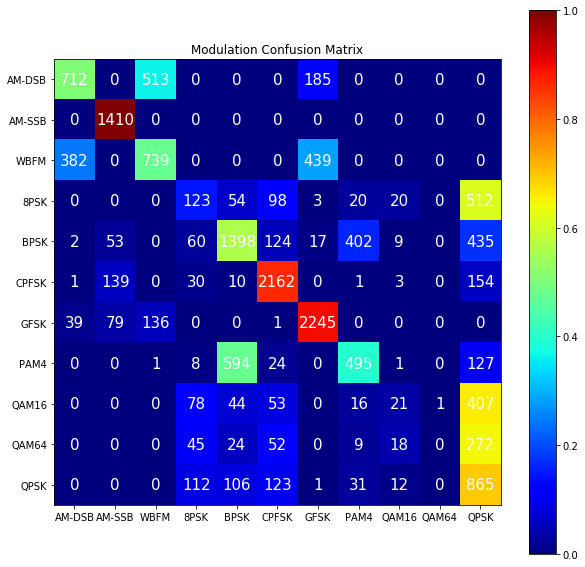

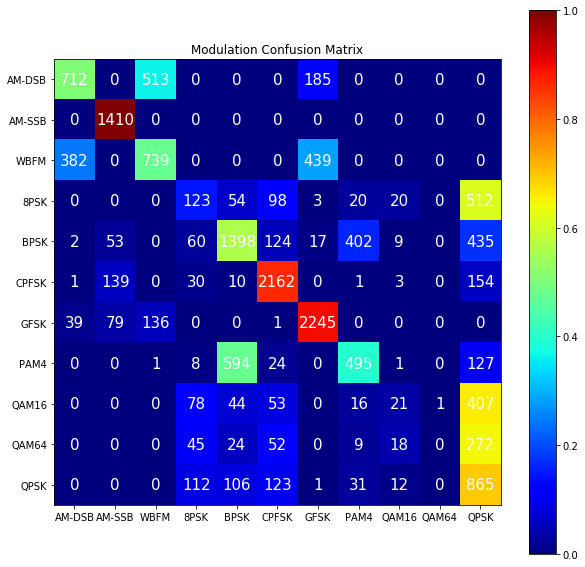

In [27]:
# Plot this confusion matrix also
plot_confusion_matrix(cm_mod, norm_cm_mod, 'Modulation Confusion Matrix',
                        mods=MODs, labels=outputClasses)

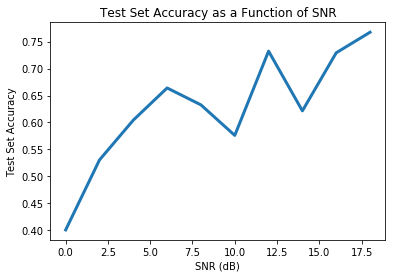

In [28]:
# Plot test accuracy as a function of SNR
plot_test_acc_snr(y_true, y_pred, RFData.testSNRs, SNRs)

Overall accuracy for Modulation AM-DSB : (0.6312056737588653, 89)
Overall accuracy for Modulation AM-SSB : (1.0, 141)
Overall accuracy for Modulation WBFM : (0.02564102564102564, 4)
Overall accuracy for Modulation 8PSK : (0.14457831325301204, 12)
Overall accuracy for Modulation BPSK : (0.464, 116)
Overall accuracy for Modulation CPFSK : (0.272, 68)
Overall accuracy for Modulation GFSK : (0.584, 146)
Overall accuracy for Modulation PAM4 : (0.0, 0)
Overall accuracy for Modulation QAM16 : (0.03225806451612903, 2)
Overall accuracy for Modulation QAM64 : (0.0, 0)
Overall accuracy for Modulation QPSK : (0.584, 73)
Overall accuracy for Modulation AM-DSB : (1.0, 141)
Overall accuracy for Modulation AM-SSB : (1.0, 141)
Overall accuracy for Modulation WBFM : (1.0, 156)
Overall accuracy for Modulation 8PSK : (0.07228915662650602, 6)
Overall accuracy for Modulation BPSK : (0.6, 150)
Overall accuracy for Modulation CPFSK : (0.996, 249)
Overall accuracy for Modulation GFSK : (0.912, 228)
Overall acc

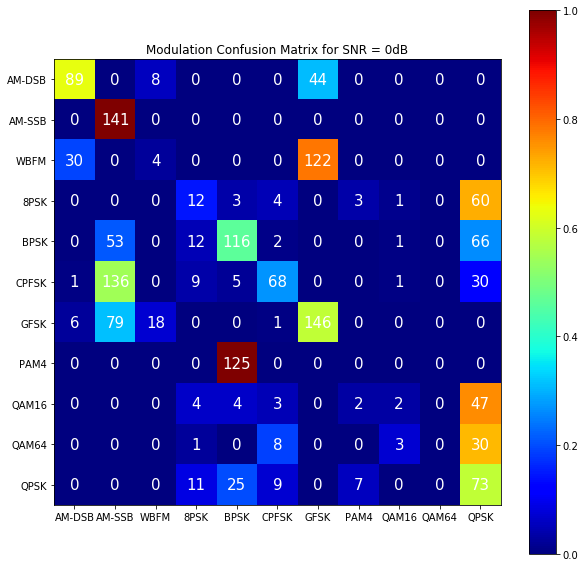

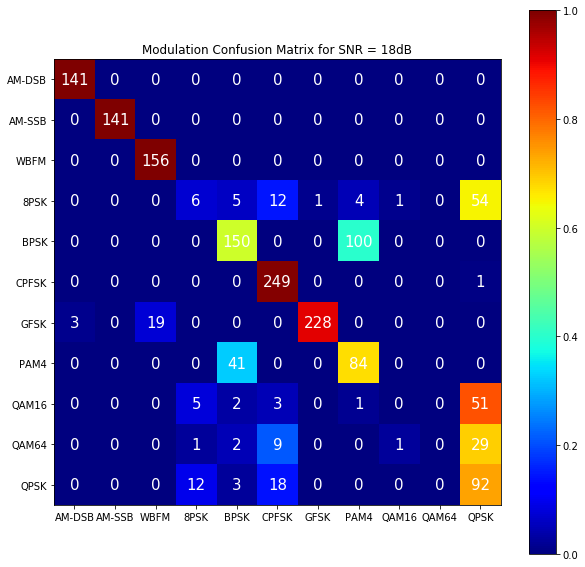

In [29]:
# Plot confusion matrices for 0 dB and 18 dB SNR cases
y_true_0dB, y_pred_0dB, y_mods_0dB = filt_by_snr(y_true, y_pred, RFData.testMods, RFData.testSNRs, SNRs, 0)
y_true_18dB, y_pred_18dB, y_mods_18dB = filt_by_snr(y_true, y_pred, RFData.testMods, RFData.testSNRs, SNRs, 18)

cm_mod_0dB, norm_cm_mod_0dB = create_mod_conf_mtx(y_true_0dB, y_pred_0dB, y_mods_0dB, MODs, outputClasses)
cm_mod_18dB, norm_cm_mod_18dB = create_mod_conf_mtx(y_true_18dB, y_pred_18dB, y_mods_18dB, MODs, outputClasses)

plot_confusion_matrix(cm_mod_0dB, norm_cm_mod_0dB, 'Modulation Confusion Matrix for SNR = 0dB',
                        mods=MODs, labels=outputClasses)

plot_confusion_matrix(cm_mod_18dB, norm_cm_mod_18dB, 'Modulation Confusion Matrix for SNR = 18dB',
                        mods=MODs, labels=outputClasses)
